# Lab session 

Last time we tried to recall the basic mathematical concepts that, in my humble opinion, you need to know in order to effectively navigate the mathematical foundation that underlies most of the tools you need in the field of machine learning.

In short, these are the basic concepts of linear algebra, convex optimization theory, differential equations and mathematical analysis.

For a more detailed acquaintance and consolidation, in this document I offer you the auxiliary material, and formulate the first homework assignment.

### Dynamical systems and stability

At first let's formulate some basic defenitions and statements of differential equations theory we need in the course of the narrative.


A general vector differential equation has the form:

$$\frac{d \vec{\phi(x)}}{dt} = \vec{f}(t, \vec{\phi(t)}), \ t > 0$$

where $\vec{\phi}(t) \in \mathbf{R}^{n}$ and $\vec{f} \in \mathbf{R}_{+} \times \mathbf{R}^{n}$. The present discussion is restricted to non-linear **autonomous systems**, i.e., systems described by:

$$\frac{d \vec{\phi(x)}}{dt} = \vec{f}(\vec{\phi(t)}), \ t > 0$$

In this case *autonomous* means **independent of time**: the right hand side of vector equation does not explicitly depend on the time variable, $t$.

The solution of differential equation $\vec{\phi}(t)$ can be called **trajectory** as a function which determine the evolution of a system in time.

A **fixed** (or critical, or equilibrium, etc.) point of the autonomous system, is any point, $\vec{\phi}$, which is a solution of 

$$\vec{f}(\vec{\phi}) = 0$$

The fixed point, $\vec{\phi}$ is said to be **stable** if, for each $\epsilon \gt 0$, there exists a $\delta(\epsilon) \gt 0$ such that:

$$ \| \vec{\phi}(t_{0}) - \vec{\phi} \| \lt \delta(\epsilon) \implies \| \vec{\phi}(t) - \vec{\phi} \| \lt \epsilon \ \forall t \geq t_{0} $$

It means that if trajectory starts in some $\delta$-radius of fixed point then for any time the trajectory does not diverge from fixed point and stays in some $\epsilon$-radius, or in other words trajectory stays in the neighborhood of fixed point. 

The fixed point, $\vec{\phi}$ is said to be **asymptotically stable** if it is stable and there is $\eta \gt 0$ such that:

$$ \lim_{t\to\infty} \| \vec{\phi}(t) - \phi \| = 0$$

whenever $\| \vec{\phi}(t_{0})\ - \vec{\phi}|_{t=0} | \lt \eta$

In contrast a trajectory near a stable critical point will remain close to that point, whereas a trajectory near an asymptotically stable critical point will move closer and closer to the critical point as $t \to \infty$.

These definitions are important for determining the convergence of a solution to a dynamical system. In most cases, we need to understand that the found solution not only sets the evolution of the system, but also remains in the vicinity of a certain point. Surprisingly, it is the guarantee of the asymptotic stability of the trajectory that turns out to be a convenient tool in gradient methods.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as pl
from itertools import product
from sympy import symbols, Function, Eq, diff, dsolve, init_printing
import numpy as np
init_printing()

Let me briefly demonstrate the concept of trajectory and stability of dynamical system. Consider the system of autonomous differential equations:

$$\frac{dx}{dt} = -x - y$$

$$\frac{dy}{dt} = x - y$$

We use `sympy` package to determine systemфтв to find an analytical solution 

In [2]:
def simple_ode():
    t, C1, C2= symbols("t C1 C2")
    x, y =  symbols("x y", cls = Function, Function = True)
    eq1 = Eq(diff(x(t), t), -1*x(t) -1*y(t))
    eq2 = Eq(diff(y(t), t), 1*x(t) -1*y(t))
    return eq1, eq2

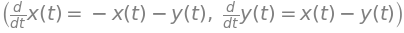

In [3]:
simple_ode()

In [4]:
sol = dsolve(simple_ode())
sol[0], sol[1]

In the other hand we can solve the system by numerical integration and draw the phase trajectories:

In [5]:
def solve_by_scipy_integrate():
    ts = np.linspace(0, 4, 1000)
    ic = np.linspace(-3, 3, 5)
    xss = [odeint(lambda x, t: [-x[0] -x[1], x[0] -x[1]], x0, ts) for x0 in list(product(ic, ic))]
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis.set_label_text('x', fontsize=15)
    ax.yaxis.set_label_text('y', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    [ax.plot(xs[:,0], xs[:,1], "r-") for xs in xss]
    X,Y = np.mgrid[-3:3:10j, -3:3:10j]
    u = -X - Y
    v = X - Y
    pl.quiver(X, Y, u, v, color = 'b')

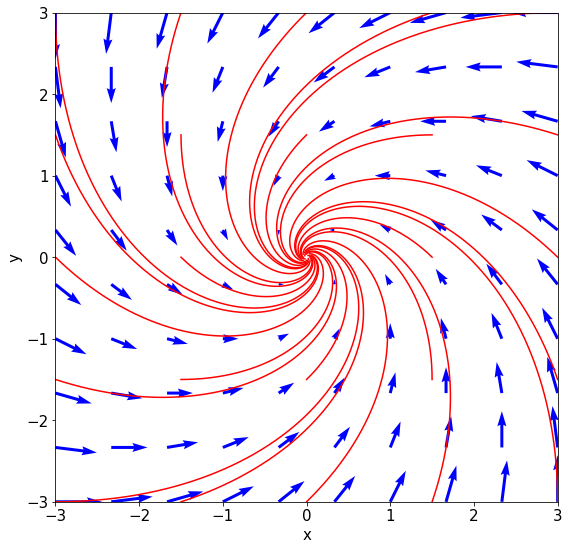

In [6]:
solve_by_scipy_integrate()

As it is easy to see, starting from any initial condition, the trajectory that is the solution to the system converges to the point of origin. The origin is the only critical point. The characteristic equation
is given by:

$$\| A - \lambda I \| = \lambda^{2} + 2\lambda + 2 = 0$$

which has complex solutions $\lambda_{1, 2} = -1 \pm i$. The critical point at the origin is a [stable focus]((https://www.math24.net/linear-autonomous-systems-equilibrium-points/)).

Fortunately comrade Lyapunov developed mathematical framework (theorem) for checking dynamical system trajectory stability:

Let $\mathbf{E}$ be an open subset of $\mathbf{R}^{n}$ containing an isolated critical point $\phi_{0}$. Suppose that $\mathbf{f}$ is continuously differentiable and that there exists a continuously differentiable function, say, $\mathbf{V}(\phi)$, which satisfies the conditions:

$$\mathbf{V}(\phi_{0}) = 0$$

$$\mathbf{V}(\phi) > 0 \ if \ \phi \neq \phi_{0}$$

Then

- If $\frac{d\mathbf{V}(\phi)}{dt} \leq 0$ for all $\phi \in E$, then $\phi_{0}$ is **stable**

- If $\frac{d\mathbf{V}(\phi)}{dt} \lt 0$ for all $\phi \in E$, then $\phi_{0}$ is **asymptotically stable**

- If $\frac{d\mathbf{V}(\phi)}{dt} \gt 0$ for all $\phi \in E$, then $\phi_{0}$ is **unstable.**

$\mathbf{V}$ called **Lyapunov function**

Again let's consider

$$\frac{dx}{dt} = -x - y$$

$$\frac{dy}{dt} = x - y$$

and try to choose appropriate from of Lyapunov function. Let it be $V = x^{2} + y^{2}$. Stable point of such a system is by definition `(0, 0)`

Then derivative of V is:

$$\frac{dV}{dt} = \frac{\partial V}{dx}\frac{dx}{dt} + \frac{\partial V}{dy}\frac{dy}{dt}$$

where $\frac{dx}{dt}$ is given by initial system of differential equations, then:

$$\frac{dV}{dt} = 2xdx + 2ydy = -2 (x^{2} + y^{2})$$

By using Lyapunov theorem we can conclude that the origin `(0, 0)` is **asymptotically stable focus**

At the same time, if consider definition of Lyapunov function, we will understand that given Lyapunov function is **convex** and and its derivative reaches the minima in origin which is the fixed point of initial system. This is a very convenient property from the point of view of problems in which it is necessary to find a solution vector using only the gradient of some well-chosen convex function.

In [7]:
from scipy.optimize import minimize
def V(x):
    return x[0]**2 + x[1]**2 
sol = minimize(V, [-1, 1])
sol.x[0], sol.x[1]

In physical sence Lyapunov function is kind of energy/potential. Thus we can try to draw **energy levels** (contours) of a potential, and the **energy landscape**

In [8]:
def draw_energy_contour(point):
    xlist = np.linspace(-10.0, 10.0, 100)
    ylist = np.linspace(-4.0, 4.0, 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = X**2 + Y**2
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z)
    ax.xaxis.set_label_text(r'$\theta$', fontsize=15)
    ax.yaxis.set_label_text(r'$\phi$', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.scatter(point[0], point[1], color='red', s = 100)

In [9]:
draw_energy_contour(sol.x)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def draw_energy_landscape(point):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection = '3d')
    x = np.arange(-10.0, 10.0, 0.1)
    y = np.arange(-6.0, 6.0, 0.1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([V((x,y)) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.5)
    cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
    ax.set_xlabel(r'$x$', fontsize=12)
    ax.set_ylabel(r'$Y$', fontsize=12)
    ax.set_zlabel(r'$V(x,y)$', fontsize=12)
    plt.tick_params(labelsize=12)
    ax.scatter3D(point[0], point[1],0, alpha = 0.8, marker='o', color='red', s = 100)
    ax.view_init(30, -70)

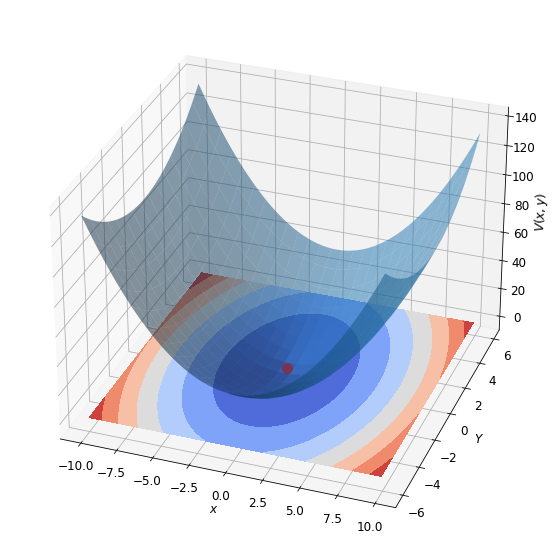

In [11]:
draw_energy_landscape(sol.x)

A well-known difficulty with using Lyapunov's direct method for analyzing dynamical systems is that there are no general guidelines for coming up with Lyapunov functions. Yet, in order to determine whether or not a given dynamical system is totally stable in the sense of Lyapunov, a valid Lyapunov function must be conjured up for every fixed point of interest. However, in most practical dynamical systems, the number of stable fixed points is rather large, and having to treat each fixed point separately is undesirable. Fortunately, certain kinds of totally stable systems possess convenient built-in collective features that allow the proof of total stability to be constructed using a single function that has the Lyapunov properties near the stable equilibria.

The system 

$$\frac{d \vec{\phi(x)}}{dt} = \vec{f}(\vec{\phi(t)}), \ t > 0$$

is called a gradient system if there exists a $C^{1}$ function, $V(\phi(t))$, with the property

$$-\vec{\nabla}_{\phi} V = \frac{d\vec{\phi}}{dt}$$

Many gradient systems originated in physics. Thus, the function, $V(\phi)$ is frequently called the *potential* or the *energy*, and the negative of its gradient, $-\vec{\nabla}_{\phi} V$ is commonly referred to as the *field* (*gradient flow*)

A very usefull property of such a system is:

$$\frac{dV}{dt} = - \| \frac{d\phi}{dt} \|^{2} \lt 0$$

**This is equivalent statement for asymptotical stability!**

### Recurrent neural networks 

Let's consider DDE (delay differential equation) with descrete delay $\tau$ of form:

$$\frac{ds(t)}{dt} = A \cdot s(t) + B\cdot r(t - \tau) + b$$

$$r(t - \tau) = G(s(t - \tau))$$

where $s(t)$ is a state signal vector (trajectory), $r(t)$ - read-out vector. Read-out is a time delay term  represents the “memory” aspects of the system. $b$ - bias.

A standard numerical technique for evaluating differential equations is to discretize them in time and compute the values of input and state signals at each time sample up to the required total duration, thereby performing numerical integration. Denoting the duration of the sampling time step as $\Delta t$, $t = n\Delta t$, and the index of the time sample as n in the application of the backward [Euler discretization](https://en.wikipedia.org/wiki/Euler_method) rule:

$$\frac{ds(t)}{dt} \approx \frac{s(n\Delta t + \Delta t) - s(\Delta t)}{\Delta t}$$

thus

$$\frac{s(n\Delta t + \Delta t) - s(\Delta t)}{\Delta t} \approx As(n\Delta t + \Delta t) +Bs(n\Delta t + \Delta t - \tau) + b$$

Now set the delay, $\tau$ , equal to the single time step. This can be interpreted as storing the value of the readout signal into memory at every time step to be used in the above equations at the next time step. After a single use, the memory storage can be overwritten with the updated value of the readout signal to be used at the next time step, and so forth. Thus, setting $\tau = \Delta t$ and replacing the approximation sign with an equal sign for convenience:

$$s((n+1)\Delta t) - s(n \Delta t) = \Delta t (As((n+1)\Delta t) + Br(n\Delta t) + b)$$

or (in case of discretisation we can replace $s(n\Delta t)$ by $s[n]$)

$$(I - A\Delta t)s[n+1] = s[n] + \Delta t Br[n] + \Delta t b$$

Denote $W_{s} = (I - A\Delta t)^{-1}$ and multiply by $W$:

$$s[n+1] = W_{s}s[n] + (\Delta t W_{s} B)r[n] + \Delta t W_s b$$

Denote $W_{r} = (\Delta t W_{s} B)$ and $\Theta = \Delta t W_s b$, we get final form:

$$s[n+1] = W_{s}s[n] + W_{r}r[n] + \Theta$$

$$r[n] = G(s[n])$$

where $W_s, W_r$ - weight matricies, $G$ is kind of activation matrix, $\Theta$ is bias.

This is kind of canonical Recurrent Neural Network transfored from the dynamical system. The main idea is that convergence of architecture can be prooved through Lyapunov functions method, in case it is ordinary differential equation.

Let's consider Hopfield neural network given by differential equation

$$\frac{ds(t)}{dt} = -s(t) + W a(t) +b$$

$s(t)$ is a vector of neuron activation levels, $W$ is the weight matrix representing synaptic connections, $b$ - are the biases, and $a(t) = \phi(s(t))$. are the nonlinear input/output activation levels. Hopfield derived the following theorem for stability properties.

*A Lyapunov function for the n-neuron Hopfield network defined by equation (above) is given by*

$$V(a) = -\frac{1}{2}a^{T}Wa + \sum_{i=1}^{n} (\int_{0}^{a_{i}} \phi^{-1}(u)du) - b^{T}a$$

For example for two-neurons with Hopfiled model differential equations can be written as:

In [12]:
from sympy import atan, pi
def hopfield_ode():
    t, C1, C2, gamma = symbols("t C1 C2 gamma")
    x, y =  symbols("x y", cls = Function, Function = True)
    eq1 = Eq(diff(x(t), t), -1*x(t) + ((2/pi)*atan(gamma*pi*x(t)/2)))
    eq2 = Eq(diff(y(t), t), -1*y(t) + ((2/pi)*atan(gamma*pi*y(t)/2)))
    return eq1, eq2

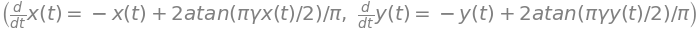

In [13]:
hopfield_ode()

In this case $W = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $, $b = [0, 0]^{T}$, $a_{1} = \frac{2}{\pi}arctan(\frac{\gamma \pi x}{2})$ and $a_{2} = \frac{2}{\pi}arctan(\frac{\gamma \pi y}{2})$

A Lyapunov function, derived using equation is given by:

$$V(a) = -\frac{1}{2} [a_1, a_2]^{T} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}[a_1, a_2] + (\int_{0}^{a_{1}} \phi^{-1}(u)du) + (\int_{0}^{a_{2}} \phi^{-1}(u)du) - [0,0]^{T}a$$


Therefore,

$$V(a) = -a_{1}a_{2} - \frac{4}{\gamma \pi^{2}} (\log(\cos(\frac{\pi a_{1}}{2})) + \log(\cos(\frac{\pi a_{2}}{2})))$$

The corresponding Lyapunov functions can be plotted using Python when $\gamma$ is given. For instance when $0 \lt \gamma \leq 1$ there is one stable critical point at the origin:

In [14]:
def solve_hopfield_by_scipy_integrate(gamma):
    ts = np.linspace(0, 4, 1000)
    ic = np.linspace(-1, 1, 10)
    xss = [odeint(
        lambda x, t: [-x[0] +(2/np.pi)*np.arctan(0.5*gamma*np.pi*x[0]),
                      -x[1] +(2/np.pi)*np.arctan(0.5*gamma*np.pi*x[1])
                     ], x0, ts)
           for x0 in list(product(ic, ic))]
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis.set_label_text('x', fontsize=15)
    ax.yaxis.set_label_text('y', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    [ax.plot(xs[:,0], xs[:,1], "r-") for xs in xss]
    X,Y = np.mgrid[-1:1:10j, -1:1:10j]
    u = -X +(2/np.pi)*np.arctan(0.5*gamma*np.pi*X)
    v = -Y + (2/np.pi)*np.arctan(0.5*gamma*np.pi*Y)
    pl.quiver(X, Y, u, v, color = 'b')

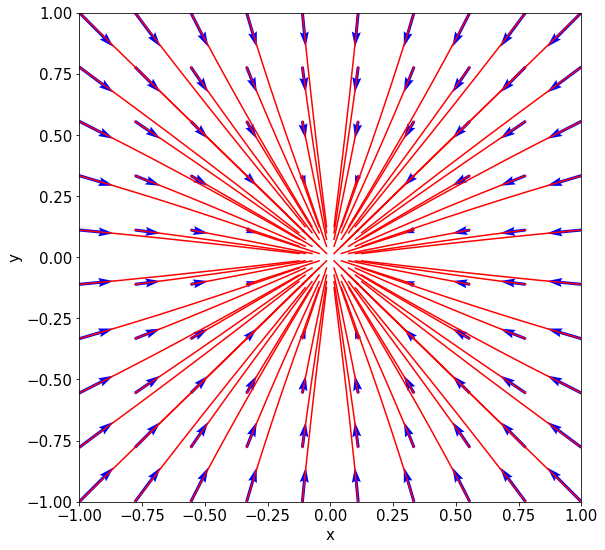

In [15]:
solve_hopfield_by_scipy_integrate(gamma=0.5)

**task**

Consider the recurrent Hopfield network modeled using the differential equations. Plot a vector field portrait and derive a suitable Lyapunov function:



In [16]:
def hopfield_hometask_ode():
    t, C1, C2, gamma = symbols("t C1 C2 gamma")
    x, y =  symbols("x y", cls = Function, Function = True)
    eq1 = Eq(diff(x(t), t), -1*x(t) + ((4/pi)*atan(gamma*pi*x(t)/2)))
    eq2 = Eq(diff(y(t), t), -1*y(t) + ((4/pi)*atan(gamma*pi*y(t)/2)))
    return eq1, eq2

hopfield_hometask_ode()

### Optimisation

Let's consider classical Linear system equations problem $\mathbf{Ax} = \mathbf{b}$. We have to find $\mathbf{x^{*}}$ which satisfies a system. We can formulate sych a problem in terms of [Constraint satisfaction problem](https://en.wikipedia.org/wiki/Constraint_satisfaction_problem). In this case $\mathbf{x^{*}}$ has to satisfy each linear constrained in a system of equations. Obviously, for arbitrary problem (such a finding hyperplane which fits a set of points in n-dimensional space) it's a trivial task to find a solution. And here we meet gradient methods, systems and *flows*

We can create a vector of residuals (differences between observed values and function values) for a linear regression model as follows: $\mathbf{r} = \mathbf{Ax} - \mathbf{b}$

Using linear algebra and brain (I hope) we can determine a product in a space: 

$$\mathbf{r}^{T}\mathbf{r} = (\mathbf{Ax} - \mathbf{b})^{T}(\mathbf{Ax} - \mathbf{b}) = \mathbf{x}^{T}\mathbf{A}^{T}\mathbf{A}\mathbf{x} - 2\mathbf{x}^{T}\mathbf{A}^{T}\mathbf{b} + \mathbf{b}^{T}\mathbf{b} = \|\mathbf{Ax} - \mathbf{b} \|^{2}_{2}$$

Our first task is to find the gradient of this cost function with respect to the weights. That
is, the vector of partial derivatives: $\nabla_{x}\mathbf{r}^{T}\mathbf{r}$. he gradient vector is a function of the weights. At a given position in weight-space, it points in the direction in which a small movement will increase the cost the most. We can differentiate small matrix/vector expressions by writing them as sums, and using the elementary differentiation rules for scalars, or just use formula 84 from [The Matrix Cookbook](http://www2.imm.dtu.dk/pubdb/edoc/imm3274.pdf):

$$\nabla_{x}\mathbf{r}^{T}\mathbf{r} = 2\mathbf{A}^{T}\mathbf{A}\mathbf{x} - 2\mathbf{A}^{T}\mathbf{b} = 2\mathbf{A}^{T}(\mathbf{A}\mathbf{x} - \mathbf{b})$$

Now we try to find the stable point, where the gradient is equal to zero (zero-vector):

$$2\mathbf{A}^{T}\mathbf{A}\mathbf{x} - 2\mathbf{A}^{T}\mathbf{b} = \mathbf{0}$$

$$\mathbf{A}^{T}\mathbf{A}\mathbf{x} = \mathbf{A}^{T}\mathbf{b}$$

$$\mathbf{x} = (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{b}$$

This is our *closed form solution*

Now consider more general framework. We want to cunstruct such a convex function (aka energy function, aka potential, aka Lyapunov function), which minima is a asymptotically stable point of gradient flow (in case gradien flow is just a ODE, oh my God!) one side, and solution of constrained satisfaction problem other side.

$$E(x) = \sum_{i=1}^{m} \sigma_{i} (r_{i}), \ r_{i} = \mathbf{a}^{T}_{i}\mathbf{x} - \mathbf{b} = \sum_{j=1}^{n} a_{ij}x_{j} - b_{j}$$

where $\sigma$ - chosen convex function. $\mathbf{r}$ - residuals vector

For $Ax = b$ we choose 

$$\sigma_{i}(r_{i}) = \frac{r_{i}^{2}}{2}$$

Thus,

$$E(x) = \frac{1}{2}\sum_{i=1}^{n} r_{i}^{2}(x) = \frac{1}{2}\mathbf{r}^{T}\mathbf{r} = \frac{1}{2}\|\mathbf{Ax} - \mathbf{b}\|^{2}_{2}$$

General steepest-descent method says:

$$\mathbf{x} \leftarrow \mathbf{x} - \mu \nabla_{x} E(x)$$

or,

$$\frac{d\mathbf{x}}{dt} = -\mu \nabla_{x} E(x) = -\mu \nabla_{x} \frac{1}{2}\|\mathbf{Ax} - \mathbf{b}\|^{2}_{2} = - \mu \mathbf{A}^{T}(\mathbf{A}\mathbf{x} - \mathbf{b})$$

or in coordinate form (and if $\mu$ is a matrx):

$$\frac{dx_{j}}{dt} =  - \sum_{p=1}^{n} \mu_{jp} \sum_{i=1}^{m} a_{ip} (\sum_{k=1}^{n} a_{ik}x_{x} - b_{i}), \ x_{j}(0) = x_{j}^{0}, \ m \geq n, j = 1...n$$

It has to be said that $\mu$ is (nxn) positive definte ($\mathbf{x}^{T}\mathbf{\mu} \mathbf{x} \gt 0 \ \forall \mathbf{x}$). Often can be chosen as diagonal

Idea: compute trajectory $x(t)$ starting at initial point $x^{0}$ that has stable point $x^{*}$ as a limit point during the *time* (time it's just a stepest computational process). Specific choice of $\mu_{jp}(t)$ must ensure the stability and convergence speed to the stationary solution (equilibrium) state. 

More than that! It is always asympotically stable!

$$\frac{dE}{dt} = \sum_{j=1}^{n} \frac{\partial E}{\partial x_{j}} \frac{dx_{j}}{dt} = (\nabla E)^{T}\frac{dx}{dt} = - (\nabla E)^{T} \mu (\nabla E)$$

### We are ready to rush!

Consider matrix equation $\mathbf{AV} = \mathbf{I}$. Classical problem of finding **inverse matrix** $V (m \times n)$.

In terms of **constrained satisfaction problem**, exists matrix function $\mathbf{G} (pxq)$, such that $\mathbf{G}(\mathbf{V}) = \mathbf{0}$. Otherwords $G$ is linear constrained which is satisfied by solution matrix $V$

In terms of **unconstrained optimisation** can be found such matrix function $\mathbf{E}$ that:

$$\min_{V} E[G[V]] \rightarrow 0 \  \Longrightarrow \  G(V) = 0$$ 

$$E[G[v]] = \sum_{i=1}^{p} \sum_{i=1}^{q} e_{ij}[g_{ij}[V]]$$

$[v_{ij}]$ - variables corresponding to solution matrix

$e_{ij}[\cdot]$ - function that measures the degree of constrained violation of element $g_{ij}(V)$

We know that constraction of such convex $E$ (Lyapunov function) is not trivial task. But we know that we are going to work not with $E$, but with its gradient flow $\nabla E$. So, can use some kind of mathematical trick and think not about form of $E$, but $\nabla E$ in appropriate form of function $F$ which we usually call **activation function**

By analogy with OLS, dynamical (or gradient) formulation (without loss of generality let's say that $\mu$ is just a scalar):

$$\frac{dv_{ij}}{dt} = - \mu \sum_{k=1}^{p} \sum_{l=1}^{q} \frac{\partial g_{kl}[V(t)]}{\partial v_{ij}} f_{ij}[g_{ij}[V(t)]], \ i=1...m, \ j = 1...n \ \ \ \ \ \ [1]$$ 

We can decompose it:
    
$$\frac{dv_{ij}}{dt} = - \mu \sum_{k=1}^{p} \sum_{l=1}^{q} \frac{\partial g_{kl}[V(t)]}{\partial v_{ij}} u_{kl}(t)$$

$$u_{ij}(t) =  f_{ij}[g_{ij}[V(t)]]$$

where

$$E[G] = \begin{bmatrix} e_{11}(g_{11}) & ... & e_{1q}(g_{1q}) \\ ... \\ e_{p1}(g_{p1}) & ... & e_{pq}(g_{pq}) \end{bmatrix}, \ F[G] = \begin{bmatrix} f_{11}(g_{11}) & ... & f_{1q}(g_{1q}) \\ ... \\ f_{p1}(g_{p1}) & ... & f_{pq}(g_{pq}) \end{bmatrix}$$

The architecture of the recurrent neural network for solving linear matrix equations consists of two bidirectionally connected layers of neurons. Each layer is composed of an array of neurons. The activation state matrices $V(t) = [v_{ij}]$ and $U(t) = [u_{ij}]$ represent an $(m \times n)$ and $(p \times q)$  array of the neurons in the output layer and hidden layer, respectivetely. 

Although $m, n, p, q$ are equal in the majority of cases, they can be different in general. Since $g_{kl}[V(t)]$ is a linear function, $\frac{\partial g_{kl}}{\partial v_{ij}}$  is a constant. The connection weight from hidden neuron `(k, l)` to output neuron `(i, j)`is defined as $-\mu \frac{\partial g_{kl}}{\partial v_{ij}}$. The connection weight from output neuron `(k, l)` to hidden neuron `(i, j)`is defined by coefficient of $v_{kl}$ in $g_{ij}[V(t)]$

There is no lateral connection among the neurons in either layer. There is a functional transformation for each neuron in the hidden layer and an integral transformation for each neuron in the output layer. One advantage of this generic recurrent neural network for solving linear matrix equations is that the implicit activation functions of output neurons are linear whereas the activation functions of hidden neurons can be nonlinear and bounded, so that there is no need for considering the ranges of variables.

### Math Analysis

#### Statment

- Let $S \in \mathbf{R}^{m \times n}$ exists, such that $G[S] = 0$
- If $f_{ij}(g_{ij}) = \frac{de_{ij}}{dg_{ij}}$, $e_{ij}$ is [convex and bounded below](https://link.springer.com/content/pdf/10.1007/BF01835982.pdf)
- $f_{ij}(0) = 0$
- $rank \begin{bmatrix} \frac{\partial g_{11}}{\partial v_{11}} & ... & \frac{\partial g_{pq}}{\partial v_{11}} \\ ... \\ \frac{\partial g_{11}}{\partial v_{mn}} & ... & \frac{\partial g_{pq}}{\partial v_{mn}} \end{bmatrix} = \min[pq, mn]$

Then described dynamical system is asympotically stable and state matris $V(t)$ is converges to solution matrix of $\mathbf{AV = I}$ in time: 

$$\lim_{t \rightarrow \infty} V(t) = V$$

#### Justification

- $e_{ij}[\cdot]$ is convex bounded below $\Longrightarrow$ $E[\cdot]$ is convex bounded below. (as sum of convex bounded below functions of linear constrained). Thus $E$ is convex of $V(t)$

- convex bounded below function is [radially unbounded](https://en.wikipedia.org/wiki/Radially_unbounded_function). $\|x\| \rightarrow \infty \Rightarrow f(x) \rightarrow \infty, f: \mathbf{R}^{n} \rightarrow \mathbf{R}$. Thus, $E[G[V]] \rightarrow \infty$ as $\| V\| \rightarrow \infty$

- $\frac{dE}{dt}$ derivative:

$$\frac{dE[G[V]]}{dt} = \sum_{k=1}^{p}\sum_{l=1}^{q}\frac{de_{kl}}{dt} = \sum_{k=1}^{p}\sum_{l=1}^{q}\sum_{i=1}^{m}\sum_{j=1}^{n} \frac{\partial e_{kl}}{dt}\frac{dv_{ij}}{dt} = $$
$$= \sum_{k=1}^{p}\sum_{l=1}^{q}\sum_{i=1}^{m}\sum_{j=1}^{n} \frac{de_{kl}}{dg_{kl}}\frac{\partial g_{kl}}{\partial v_{ij}}\frac{dv_{ij}}{dt}= \sum_{k=1}^{p}\sum_{l=1}^{q}\sum_{i=1}^{m}\sum_{j=1}^{n} f_{kl}(g_{kl})\frac{\partial g_{kl}}{\partial v_{ij}}\frac{dv_{ij}}{dt} = (*)$$


Using [1] we get expression:

$$-\frac{1}{\mu}\frac{dv_{ij}}{dt} = \sum_{k=1}^{p} \sum_{l=1}^{q} \frac{\partial g_{kl}[V(t)]}{\partial v_{ij}} f_{ij}[g_{ij}[V(t)]]$$

$$(*) = -\frac{1}{\mu}\sum_{i=1}^{m}\sum_{j=1}^{n} [\frac{dv_{ij}(t)}{dt}]^{2}$$

thus if $\frac{dv_{ij}}{dt} \neq 0 \Rightarrow \frac{dE}{dt} \lt 0$, else equal zero

Thus $E$ is **Lyapunov function** and dynamical system is asymptotically stable

From the statment

$$\sum_{k=1}^{p}\sum_{l=1}^{q}\sum_{i=1}^{m}\sum_{j=1}^{n} \frac{\partial e_{kl}}{dt}\frac{dv_{ij}}{dt} -\frac{1}{\mu}\sum_{i=1}^{m}\sum_{j=1}^{n} [\frac{dv_{ij}(t)}{dt}]^{2}$$

we can get next gradient equation:

$$- \mu \frac{\partial E[G[V]]}{\partial v_{ij}} = \frac{dv_{ij}(t)}{dt}$$

This means that the activation state matrix $V(t)$ evolves in the direction of negative gradient of $E[G(V)]$ as time evolves. In other words, the steady activation state matrix of the recurrent neural network minimizes $E[G(V)]$ in a gradient descent fashion.

Considering statment about **rank** and equation

$$\frac{dv_{ij}}{dt} = - \mu \sum_{k=1}^{p} \sum_{l=1}^{q} \frac{\partial g_{kl}[V(t)]}{\partial v_{ij}} u_{kl}(t)$$

we can conclude that $\frac{dv_{ij}}{dt} = 0$ only if $u_{kl} = 0$ (**Why?**)

In addition to that we use definition of $e_{ij}$ convexity:

$$\frac{d^{2}e_{ij}}{dg_{ij}^{2}} = \frac{f_{ij}(g_{ij})}{dg_{ij}} \geq 0$$

The last condition we use: $f_{ij} = 0$ implies $f_{ij}(g_{ij}) = 0$ only if $g_{ij} = 0$

To sum up. The convex objective function $E$ serves as a norm to evaluate the degree of constraint satisfaction of $G(V)$. Important property is that $E(G) = 0$ if and only if $\frac{e_{ij}(0)}{dg_{ij}} = f_{ij}(0) = 0$.

The selection of $e_{ij}$ determines the selection of $f_{ij}$. For example:

$e_{ij}(g_{ij}) = g_{ij}^{2} \ \sim f_{ij} = g_{ij}$

$e_{ij}(g_{ij}) = g_{ij} \arctan{g_{ij}} - \ln \sqrt{1+g_{ij}^{2}} \ \sim f_{ij} = \arctan{g_{ij}}$

$e_{ij}(g_{ij}) = \exp{g_{ij}} + \exp{- g_{ij}} \ \sim f_{ij} = \exp{g_{ij}} - \exp{- g_{ij}}$

### Inverse matrix example

Let $V$ be a $(n \times n)$ matrix in problem of inverse matrix. By analogy with OLS (yes, again), we can formulate General steepest-descent method says:

$$\mathbf{V} \leftarrow \mathbf{V} - \mu \nabla_{x} E(x)$$

or,

$$\frac{d\mathbf{V}(t)}{dt}  = - \mu \mathbf{A}^{T}\mathbf{F}[\mathbf{A}\mathbf{V}(t) - \mathbf{I}]$$

in coordinates:

$$\frac{dv_{ij}(t)}{dt}  = - \mu \sum_{k=1}^{n}a_{ki}f_{kj}[\sum_{l=1}^{n} a_{kl}v_{lj}(t) - \delta_{ij}]$$

Or in the form of the system:

$$\frac{dv_{ij}(t)}{dt}  = - \mu \sum_{k=1}^{n}a_{ki}u_{kj}(t)$$

$$u_{kj}(t) = f_{kj}[\sum_{l=1}^{n} a_{kl}v_{lj}(t) - \delta_{ij}]$$

The architecture of network consists of two layers and each layer consists of an array of n neurons. The connection weight matrix from the hidden layer to the output layer is defined as $-\mu A^{T}$ and the connection weight matrix from the output layer to the hidden layer is defined as $A$. There is no lateral connection among neurons in each layer. The biasing threshold (constant input) matrix in the hidden layer is defined as $-I$ and there are no biases for the neurons in the output layer.

### Home assinment

#### LU-decomposition (#1)

Derive the dinamical (gradient) system which defines architecture of neural network for the problem of LU-decomposition. Prove that such a system is asymptotically stable.

---

**YOUR LaTex code patter here**


...
---

#### LU-decomposition (#2)

Develop code of neural network for derived gradient system. You can use any neural network framework. But please add you packages into `requirments.txt`

In [17]:
### YOUR CODE HERE



#### LU-decomposition (#3)

Benchmark your code solution and provide the performance test in comparison with classical iterative scheme of LU decomposition (you can use any package implementation or implement it by your self).

In [18]:
### YOUR CODE HERE



#### Cholesky decomposition (#1)

Derive the dinamical (gradient) system which defines architecture of neural network for the problem of Cholesky decomposition. Prove that such a system is asymptotically stable.

---

**YOUR LaTex code patter here**


...
---

#### Cholesky decomposition (#2)


Develop code of neural network for derived gradient system. You can use any neural network framework. But please add you packages into `requirments.txt`

In [19]:
### YOUR CODE HERE



#### Cholesky decomposition (#3)

Benchmark your code solution and provide the performance test in comparison with classical iterative scheme of Cholesky decomposition (you can use any package implementation or implement it by your self).

In [20]:
### YOUR CODE HERE

